# ETL and Feature Engineering

This script will import the already 'cleaned' dataset I prepared for last submission.

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import cleaned dataset. It is the one that was exported with the script from last submission. 
df = pd.read_csv("US_Accidents_June20_CLEAN_Week1.csv")
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Duration,Start_Lat,Start_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0 days 05:14:00.000000000,39.865147,-84.058723,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0 days 00:30:00.000000000,39.928059,-82.831184,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0 days 00:30:00.000000000,39.063148,-84.032608,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0 days 00:30:00.000000000,39.747753,-84.205582,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0 days 00:30:00.000000000,39.627781,-84.188354,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## ETL

### Typecheck and Typecasting

In terms of ETL, I'll be using only the data of one dataset, I don't have to care about the merge with other data.<br>
I'll do a sanity check of all types present in the dataset and transform the ones I consider.

In [3]:
#Import dataset with description, feature types and examples that I created for the last submission.
df_typecheck = pd.read_csv('Week1_Variable_Summary_Table.csv')
df_typecheck = df_typecheck.loc[df_typecheck.Attribute.isin(df.columns)]
df_typecheck.reset_index( inplace=True)
df_typecheck = df_typecheck.drop(columns=['index', 'Description', 'Example'])
df_typecheck

,#,Attribute,Data type
0,1,ID,<class 'str'>
1,2,Source,<class 'str'>
2,3,TMC,<class 'numpy.float64'>
3,4,Severity,<class 'numpy.int64'>
4,5,Start_Time,<class 'pandas._libs.tslibs.timestamps.Timesta...
5,6,End_Time,<class 'pandas._libs.tslibs.timestamps.Timesta...
6,7,Start_Lat,<class 'numpy.float64'>
7,8,Start_Lng,<class 'numpy.float64'>
8,11,Distance(mi),<class 'numpy.float64'>
9,12,Description,<class 'str'>


This table is apparently wrong, since when exported to csv the data type Timestamp apparently changes to String.
I'll change the datatype for 'Start_Time', 'End_Time' and 'Weather_Timestamp': timestamps.Timestamp.<br>
Also, I'm missing the feature I created called 'Duration', since it was created after I created the table.

In [4]:
#Change all times to timestamps.Timestamp-data type.
df['Start_Time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
df['Weather_Timestamp'] = pd.to_datetime(df.Weather_Timestamp, format='%Y-%m-%d %H:%M:%S')

## Feature Engineering

In this section I'll focus on cleaning the data in order  for my prediction module to be more accurate. For that purpose, I'll create a US_Accidents_June20_CLEAN_Week1.csv, which will only contain the features that are relevant for the training of the model. Also, those features should be already in shape to be fed to the model, so one-hot encoding will also be performed. Irrelevant features will be deleted.

### Irrelevant Features

All features that cannot be used as a predictor for the severity of the accident should be deleted. For that reason, all data that is gathered after the accident has taken place (i.e. 'End_Timestamp') and all data that has no relation to the accident (i.e. 'ID') will be deleted.

In [5]:
# Display columns
print('Number of features:', df.columns.shape[0])
print(df.columns)

Number of features: 45
Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Duration',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


#### Drop ID and Source since not relevant for prediction

The accident ID is not relevant for predicting the severity, so it will be dropped.

In [6]:
print('Number of features before drop:', df.columns.shape[0])
df = df.drop(['ID', 'Source'], axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features before drop: 45
Number of features after drop: 43


#### Drop TMC since it is defined after the accident

The TMC (Code that describes the accident) is of course not a valid predictor since it is defined after the accident takes place.

In [7]:
print('Number of features before drop:', df.columns.shape[0])
df = df.drop('TMC', axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features before drop: 43
Number of features after drop: 42


#### Drop End_Time, Duration and Distance(mi)

In order to predict severity of the accident, we can of course not now how long it took since the two mayor factors that define the Severity level are Duration until traffic was cleared and Distance of the Accident!

In [8]:
print('Number of features before drop:', df.columns.shape[0])
df = df.drop(['End_Time', 'Duration', 'Distance(mi)'], axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features before drop: 42
Number of features after drop: 39


#### Drop Description

Since the description of the accident is filled out after the accident happened, it cannot be used as a predictor!

In [9]:
# Drop column 'Description'
print('Number of features before drop:', df.columns.shape[0])
df = df.drop('Description', axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features before drop: 39
Number of features after drop: 38


#### Drop Weather_Timestamp

Now that we have all the Timestamps in the same format, let's calculate the difference between last weather record and the time of the accident in order to see how up to date the weather records are.

In [10]:
#Calculate difference between Start_Time and Weather_Timestamp

weather_time_diff = df.Weather_Timestamp - df.Start_Time
#Transform to seconds
weather_time_diff = weather_time_diff.dt.total_seconds()
#Filter out biggest differences
weather_time_diff = weather_time_diff.sort_values(ascending=True)

#See how many of the Weather_Timestamps are more than one day away from the time of the accident. 
weather_bool_big_diff_vec = (weather_time_diff > 86400)|(weather_time_diff < -86400)
print('Number of Weather_Timestamps with more than 1 day difference wrt accident time:', weather_bool_big_diff_vec.sum())

Number of Weather_Timestamps with more than 1 day difference wrt accident time: 0


All of the Weather_Timestamps are within one day from the accident time, which is good. That means the Weather_Conditions are up to date and reflect the real weather at the time of the accident.

In [11]:
# Drop Weather_Timestamp
df = df.drop('Weather_Timestamp', axis=1)
print('Number of features after dropping Weather_Timestamp:', df.columns.shape[0])

Number of features after dropping Weather_Timestamp: 37


#### Deal with Sunset/Twilight

There are 4 Features that describe if at the time of the accident it was 'Day' or 'Night'. Since in my opinion the influence of this factor is mainly in the vision of the driver. I've read through the 4 descriptions and decided I'll only look at the Sunrise_Sunset feature, since it is the one that describes when the sun is in line with the horizont.

In [12]:
df = df.drop(columns=['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])
print('Number of features after drop:', df.columns.shape[0])

Number of features after drop: 34


#### Deal with Country

All the data is from the USA, to this feature doesn't give any useful information. I'll drop the column.

In [13]:
#Drop 'Country'
df = df.drop('Country', axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features after drop: 33


### Feature grouping

#### Weather Condition grouping

In [14]:
# Create a shorter list for 'Weather_Condition'

print('Unique Weather_Condtions:', df['Weather_Condition'].unique().shape)

Unique Weather_Condtions: (128,)


In [15]:
print('Unique Weather_Condtions list:', df['Weather_Condition'].unique())

Unique Weather_Condtions list: ['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' 'Cloudy / Win

There are 128 unique weather conditions. After inspecting the weather conditions, I've decided to group them in 9 different groups after my judgement of similarity. This way I can get insights more easily. Also, this will be handy to see the feature importance when the model is created.

In [16]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear|N/A Precipitation', case=False, na = False), 1, 0)
df['Cloudy'] = np.where(df['Weather_Condition'].str.contains('Cloud|Cloudy|Overcast', case=False, na = False), 1, 0)
df['Rain_Light'] = np.where(df['Weather_Condition'].str.contains('Rain|Storm|storm|Drizzle', case=False, na = False), 1, 0)
df['Rain_Heavy'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms|Thunder|Showers', case=False, na = False), 1, 0)
df['Snow_Light'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Snow_Heavy'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls|Hail', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog|Haze', case=False, na = False), 1, 0)
df['Windy'] = np.where(df['Weather_Condition'].str.contains('Wind|Windy|Dust', case=False, na = False), 1, 0)
df['Sand/Ash'] = np.where(df['Weather_Condition'].str.contains('Sand|Ash', case=False, na = False), 1, 0)

print("Number of features:", df.columns.shape)
df.columns

Number of features: (42,)


Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Clear', 'Cloudy', 'Rain_Light',
       'Rain_Heavy', 'Snow_Light', 'Snow_Heavy', 'Fog', 'Windy', 'Sand/Ash'],
      dtype='object')

In [17]:
#Drop Weather_Condition column
df = df.drop(['Weather_Condition'], axis=1)
print('Number of features after drop:', df.columns.shape)

Number of features after drop: (41,)


#### Wind Direction grouping

In the begining I also wanted to group the wind directions as in the Weather Conditions, but after looking at a Wind Direction Rose I have decided to not group them, since there is no way of not biasing the groups, since wind directions like SWS can be grouped together with S or SW.

In [18]:
df['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', nan, 'S', 'VAR', 'CALM', 'N'], dtype=object)

There are though some wind directions that are the same and are written in different ways, so those will be grouped.

In [19]:
#Group Wind_Direction that are the sam
df['Wind_Direction'].replace('Calm','CALM', inplace=True)
df['Wind_Direction'].replace('Variable','VAR', inplace=True)
df['Wind_Direction'].replace('South','S', inplace=True)
df['Wind_Direction'].replace('North','N', inplace=True)
df['Wind_Direction'].replace('East','E', inplace=True)
df['Wind_Direction'].replace('West','W', inplace=True)

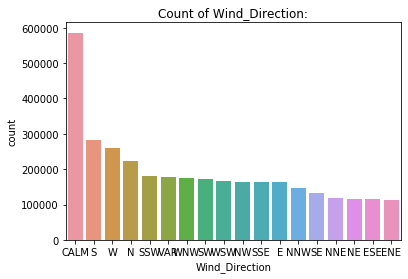

In [20]:
#Plot Wind_Direction in order to see if the distribution makes sense.
fig, ax = plt.subplots()
sns.countplot('Wind_Direction',data=df,ax=ax,order=df['Wind_Direction'].value_counts().index)
ax.set_title('Count of Wind_Direction:')
plt.show()

The distribution looks good after the grouping.

### Missing Data

#### Imputting continous values

For the moment I'll only impute the float values with the median of that particular feature (more robust towards outliers than mean). For String features, a more detailed analysis should be done.

In [21]:
# I'll impute using the median value for that column.
#For computational efficiency reasons, I'll create a list with only the Features where NaN-values are present. So, I won't iterate through all Features to impute the NaNs.
nan_vec = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

for element in nan_vec:
    df[element].fillna(df[element].median(), inplace=True)
    
print()
print(df.isnull().sum()/(df.shape[0])*100)


Severity           0.000000
Start_Time         0.000000
Start_Lat          0.000000
Start_Lng          0.000000
Street             0.000000
Side               0.000000
City               0.003188
County             0.000000
State              0.000000
Zipcode            0.030424
Timezone           0.110428
Airport_Code       0.192337
Temperature(F)     0.000000
Humidity(%)        0.000000
Pressure(in)       0.000000
Visibility(mi)     0.000000
Wind_Direction     1.675595
Wind_Speed(mph)    0.000000
Amenity            0.000000
Bump               0.000000
Crossing           0.000000
Give_Way           0.000000
Junction           0.000000
No_Exit            0.000000
Railway            0.000000
Roundabout         0.000000
Station            0.000000
Stop               0.000000
Traffic_Calming    0.000000
Traffic_Signal     0.000000
Turning_Loop       0.000000
Sunrise_Sunset     0.003273
Clear              0.000000
Cloudy             0.000000
Rain_Light         0.000000
Rain_Heavy         

#### Imputting categorical values

In this section I'll look at the missing data of each specific categorical value in order to assess the best way to deal with the NaNs.

##### Description, City, Zipcode, Timezone, Airport_Code, Sunrise_Sunset

Since the number of datapoints that are missing in this columns is so small (all > 1.5% !) I'll just drop them. An alternative approach to deal with missing values of geographical features (i.e. Wind_Direction) would be to group the datapoints by location ('Zipcode' or 'City') and take the 'most_common' value that appears in the location. In this case I've decided to just drop the values since they are so few.

In [22]:
df = df.dropna(subset=['Wind_Direction', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Sunrise_Sunset'])

In [23]:
#print remaining missing values
print(df.isnull().sum()/(df.shape[0])*100)

Severity           0.0
Start_Time         0.0
Start_Lat          0.0
Start_Lng          0.0
Street             0.0
Side               0.0
City               0.0
County             0.0
State              0.0
Zipcode            0.0
Timezone           0.0
Airport_Code       0.0
Temperature(F)     0.0
Humidity(%)        0.0
Pressure(in)       0.0
Visibility(mi)     0.0
Wind_Direction     0.0
Wind_Speed(mph)    0.0
Amenity            0.0
Bump               0.0
Crossing           0.0
Give_Way           0.0
Junction           0.0
No_Exit            0.0
Railway            0.0
Roundabout         0.0
Station            0.0
Stop               0.0
Traffic_Calming    0.0
Traffic_Signal     0.0
Turning_Loop       0.0
Sunrise_Sunset     0.0
Clear              0.0
Cloudy             0.0
Rain_Light         0.0
Rain_Heavy         0.0
Snow_Light         0.0
Snow_Heavy         0.0
Fog                0.0
Windy              0.0
Sand/Ash           0.0
dtype: float64


## Encoding the data

### Time Encoding

In [24]:
print('Number of features before feature creation:', df.columns.shape[0])
#Year
df['Year'] = df['Start_Time'].dt.year

#Month
n_month = df['Start_Time'].dt.month
df['Month'] = n_month

#Weekday
df['Weekday']= df['Start_Time'].dt.weekday

#Day as number between 1-365
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in n_month.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

#Hour
df['Hour'] = df['Start_Time'].dt.hour

#Minute
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

print('Number of features after feature creation:', df.columns.shape[0])
print()

df.loc[:5, ['Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

Number of features before feature creation: 41
Number of features after feature creation: 47



,Year,Month,Weekday,Day,Hour,Minute
0,2016,2,0,39,5,346.0
1,2016,2,0,39,6,367.0
2,2016,2,0,39,6,409.0
3,2016,2,0,39,7,443.0
4,2016,2,0,39,7,459.0
5,2016,2,0,39,7,464.0


In [25]:
#One Hot encode Year, Month, Weekday, Hour
print('Number of features before one-hot encoding:', df.columns.shape[0])
df = pd.get_dummies(df, columns=['Year', 'Month', 'Weekday', 'Hour'], drop_first=False)
print('Number of features after one-hot encoding:', df.columns.shape[0])

Number of features before one-hot encoding: 47
Number of features after one-hot encoding: 91


For <b>'Minute'</b>, the one-hot encoding would yield too many dimensions and we could fall into the curse of dimensionality. For that reason with categorical variables that have many different values, it makes sense to transform them into the frequency domain and then use that instead of the variable itself.

In [26]:
# Transform Minute into Minute_Freq
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60

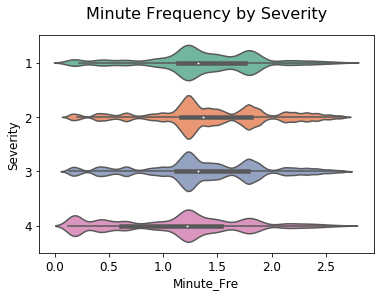

In [27]:
# Plot violin plot
df['Severity'] = df['Severity'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity", data=df, palette="Set2")    
plt.xlabel('Minute_Fre', size=12)
plt.ylabel('Severity', size=12)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity', size=16, y=1.05)
plt.show()

There is no big difference, but there is a subtle decrease in frequency there higher the severity of the accident. WHat this means is that accidents with that happen less frequently have a higher probability of being more severe. Formulated another way: accidents that happen a lot are usually less severe that accidents that rarely happen.

In [28]:
#Drop 'Start_Time' and 'Minute'
print('Number of features before drop:', df.columns.shape[0])
df = df.drop(['Start_Time','Minute'], axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features before drop: 92
Number of features after drop: 90


### Latitude and Longitude Encoding

Since they are continous values, no encoding needed.

### Street Encoding

Same dilemma as with Time. Since there are so many different streets, a one-hot encoding would lead to too many dimensions. Instead, a typical approach is to take the frequency of the value (in this case street name).

In [29]:
# Transform Street into Street_Freq
df['Street_Freq'] = df.groupby(['Street'])['Street'].transform('count')
df['Street_Freq'] = df['Street_Freq']/df['Street_Freq'].unique().shape[0]

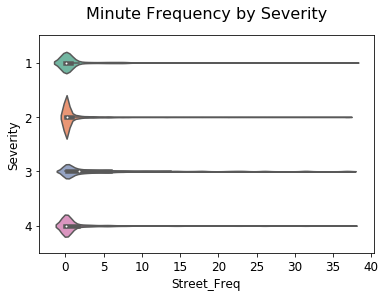

In [30]:
# Plot violin plot
df['Severity'] = df['Severity'].astype('category')
sns.violinplot(x='Street_Freq', y="Severity", data=df, palette="Set2")    
plt.xlabel('Street_Freq', size=12)
plt.ylabel('Severity', size=12)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity', size=16, y=1.05)
plt.show()

In order to deal with the skewness of the distribution, take the log of the distribution. 

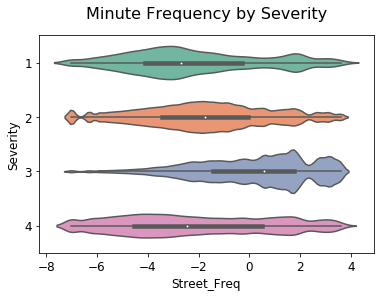

In [31]:
#Take log
df['Street_Freq'] = df['Street_Freq'].apply(lambda x: np.log(x))

# Plot again 
df['Severity'] = df['Severity'].astype('category')
sns.violinplot(x='Street_Freq', y="Severity", data=df, palette="Set2")    
plt.xlabel('Street_Freq', size=12)
plt.ylabel('Severity', size=12)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity', size=16, y=1.05)
plt.show()

This is interesting. For severity levels 1,2 and 3, severity goes up with frequency of the accidents. So accidents with severity level 3 happen in places where accidents occur very frequently.<br>
For accidents with level 4 severity the frequency is even lower than for accidents with severity level 1. This means that the <b>really severe</b> accidents happen in places where accidents happen <b>the least frequent</b>.

In [32]:
#Drop 'Street' column
print('Number of features before drop:', df.columns.shape[0])
df = df.drop('Street', axis=1)
print('Number of features after drop:', df.columns.shape[0])

Number of features before drop: 91
Number of features after drop: 90


### Side

A basic one-hot encoding will be enough, since there are only 2 possible values. 

In [33]:
#Create one-hot encoding.
print('Number of features before one-hot encoding:', df.columns.shape[0])
df = pd.get_dummies(df, columns=['Side'])
print('Number of features after one-hot encoding:', df.columns.shape[0])

Number of features before one-hot encoding: 90
Number of features after one-hot encoding: 92


### Other Frequency Features: City, County, Zipcode, Airport_Code

Same as for 'Street', I'll use the frequency.

In [34]:
print('Number of features before frequency features creation:', df.columns.shape[0])

#City
df['City_Freq'] = df.groupby(['City'])['City'].transform('count')
df['City_Freq'] = df['City_Freq']/df.City.unique().shape[0]

#County
df['County_Freq'] = df.groupby(['County'])['County'].transform('count')
df['County_Freq'] = df['County_Freq']/df.County.unique().shape[0]

#Zipcode
df['Zipcode_Freq'] = df.groupby(['Zipcode'])['Zipcode'].transform('count')
df['Zipcode_Freq'] = df['Zipcode_Freq']/df.Zipcode.unique().shape[0]

#Airport_Code
df['Airport_Code_Freq'] = df.groupby(['Airport_Code'])['Airport_Code'].transform('count')
df['Airport_Code_Freq'] = df['Airport_Code_Freq']/df.Airport_Code.unique().shape[0]

print('Number of features after frequency features creation:', df.columns.shape[0])

Number of features before frequency features creation: 92
Number of features after frequency features creation: 96


In [35]:
#Drop columns with original variables
print('Number of features before drop:', df.columns.shape[0])

df = df.drop(columns=['City', 'County', 'Zipcode', 'Airport_Code'])

print('Number of features before drop:', df.columns.shape[0])

Number of features before drop: 96
Number of features before drop: 92


### Other features that will be one-hot enconded: 'Day', 'State', 'Timezone', 'Wind_Direction' and 'Sunrise_Sunset'

In [36]:
#Create one-hot encoding.
print('Number of features before one-hot encoding:', df.columns.shape[0])
df = pd.get_dummies(df, columns=['State', 'Timezone', 'Wind_Direction', 'Sunrise_Sunset'], drop_first=False)
print('Number of features after one-hot encoding:', df.columns.shape[0])

Number of features before one-hot encoding: 92
Number of features after one-hot encoding: 161


## Export

In [37]:
#Display names of columns
print(df.columns.shape)
df.columns

(161,)


Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump',
       ...
       'Wind_Direction_SE', 'Wind_Direction_SSE', 'Wind_Direction_SSW',
       'Wind_Direction_SW', 'Wind_Direction_VAR', 'Wind_Direction_W',
       'Wind_Direction_WNW', 'Wind_Direction_WSW', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night'],
      dtype='object', length=161)

In [38]:
#Save file with name as in convention explained
df.to_csv("US_Accidents_June20_CLEAN_Week2.csv", index=False)